In [58]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import math,time,random,datetime
plt.style.use('seaborn-deep')
import missingno
import catboost
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,label_binarize
from catboost import CatBoostClassifier,Pool,cv
from sklearn.model_selection import  train_test_split
from sklearn.svm import LinearSVC
from sklearn import model_selection,tree,preprocessing,metrics,linear_model
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LinearRegression,LogisticRegression,SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import warnings 
warnings.filterwarnings('ignore')

In [2]:
gs=pd.read_csv(r"C:\Users\niran\Downloads\Titanic\gender_submission.csv")
train=pd.read_csv(r"C:\Users\niran\Downloads\Titanic\train.csv")
test=pd.read_csv(r"C:\Users\niran\Downloads\Titanic\test.csv")

In [3]:
gs.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:>

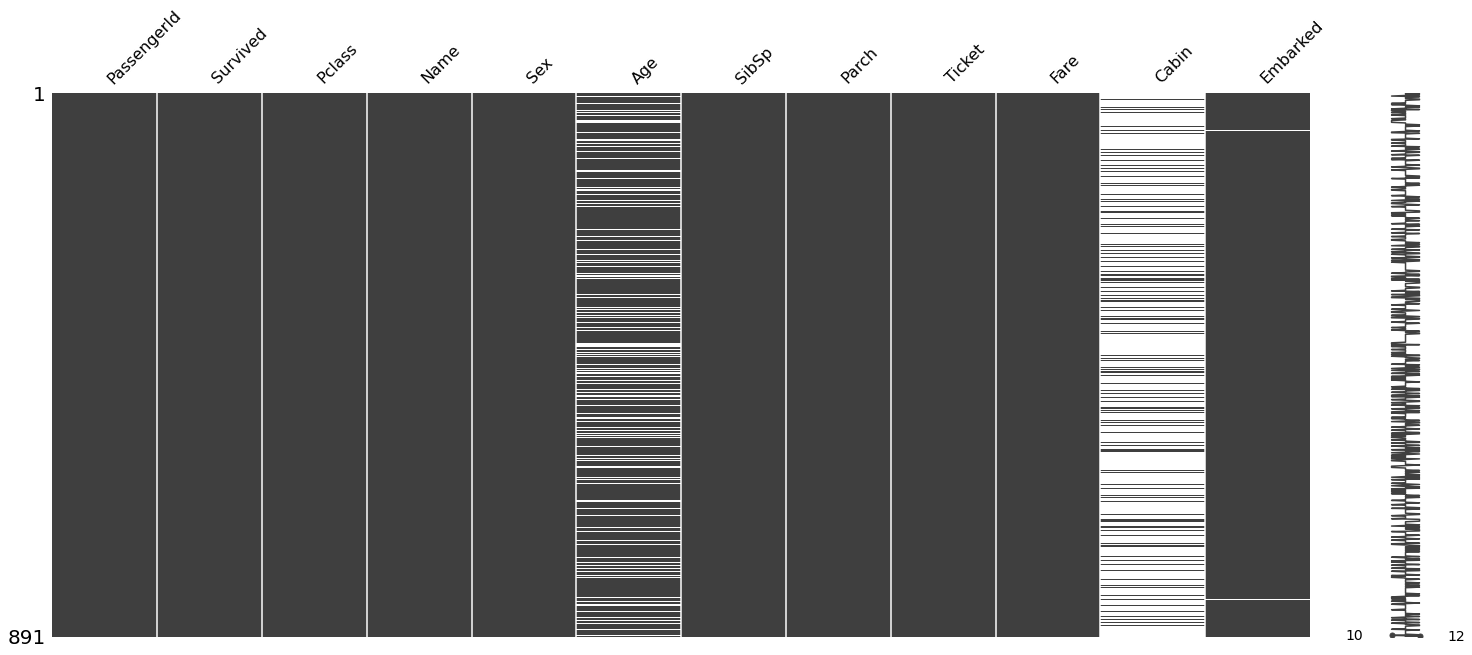

In [7]:
#searching for holes in data
missingno.matrix(train,figsize=(25,10))

In [8]:
#finding number of missing values
def missing(df,col):
    miss={}
    print("no. of missing values in each col:")
    dfl=len(df)
    for c in col:
        total_val=df[c].value_counts().sum()#does not count missing values
        miss[c]=dfl-total_val
    return miss

missing_values=missing(train,train.columns)
missing_values

no. of missing values in each col:


{'PassengerId': 0,
 'Survived': 0,
 'Pclass': 0,
 'Name': 0,
 'Sex': 0,
 'Age': 177,
 'SibSp': 0,
 'Parch': 0,
 'Ticket': 0,
 'Fare': 0,
 'Cabin': 687,
 'Embarked': 2}

In [9]:
bin_df=pd.DataFrame()   #for discretised cont values
cont_df=pd.DataFrame() #for cont values

In [10]:
train.dtypes #checking the data types in train df

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

0    549
1    342
Name: Survived, dtype: int64


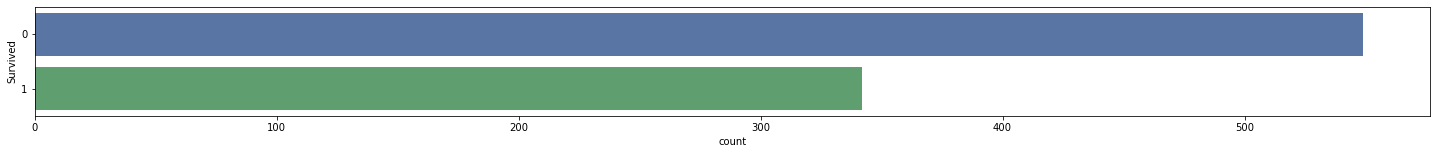

In [11]:
#feature analysis 1(survived)

figure=plt.figure(figsize=(25,2))
sb.countplot(y='Survived',data=train)
print(train.Survived.value_counts())

In [12]:
bin_df['survived']=train['Survived']
print(bin_df.head())
cont_df['survived']=train['Survived']
cont_df.head()

   survived
0         0
1         1
2         1
3         1
4         0


,survived
0,0
1,1
2,1
3,1
4,0


<AxesSubplot:xlabel='Pclass', ylabel='Density'>

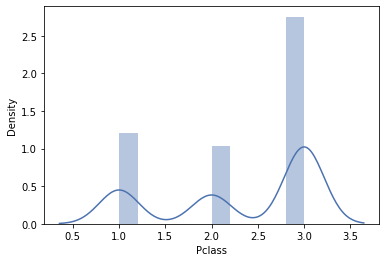

In [13]:
#feature analysis 2(pclass)
sb.distplot(train.Pclass)

In [14]:
bin_df["pclass"]=train['Pclass']
cont_df["pclass"]=train['Pclass']
cont_df.head()

,survived,pclass
0,0,3
1,1,1
2,1,3
3,1,1
4,0,3


<AxesSubplot:xlabel='count', ylabel='Sex'>

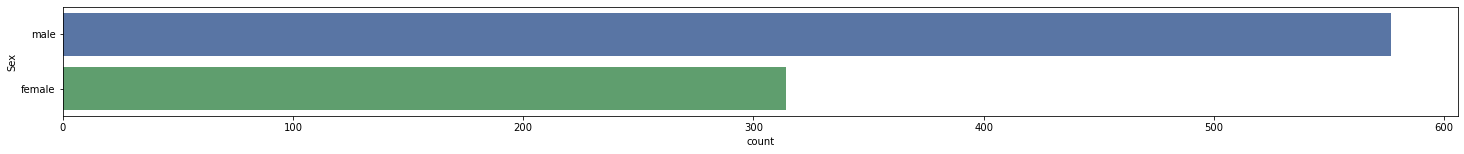

In [15]:
#feature analysis 3(Sex)
plt.figure(figsize=(25,2))
sb.countplot(y='Sex',data=train)

In [16]:
bin_df['sex']=train['Sex']
bin_df['sex']=np.where(bin_df['sex']=='male',1,0)
cont_df['sex']=train['Sex']
bin_df.head()

,survived,pclass,sex
0,0,3,1
1,1,1,0
2,1,3,0
3,1,1,0
4,0,3,1


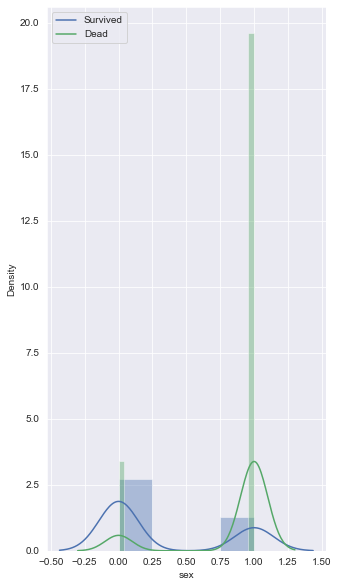

In [17]:
sb.set_style("darkgrid")
f=plt.figure(figsize=(5,10))
sb.distplot(bin_df.loc[bin_df['survived']==1]['sex'],kde_kws={'label':'Survived'})
sb.distplot(bin_df.loc[bin_df['survived']==0]['sex'],kde_kws={'label':'Dead'})
plt.legend()
plt.show()


<AxesSubplot:>

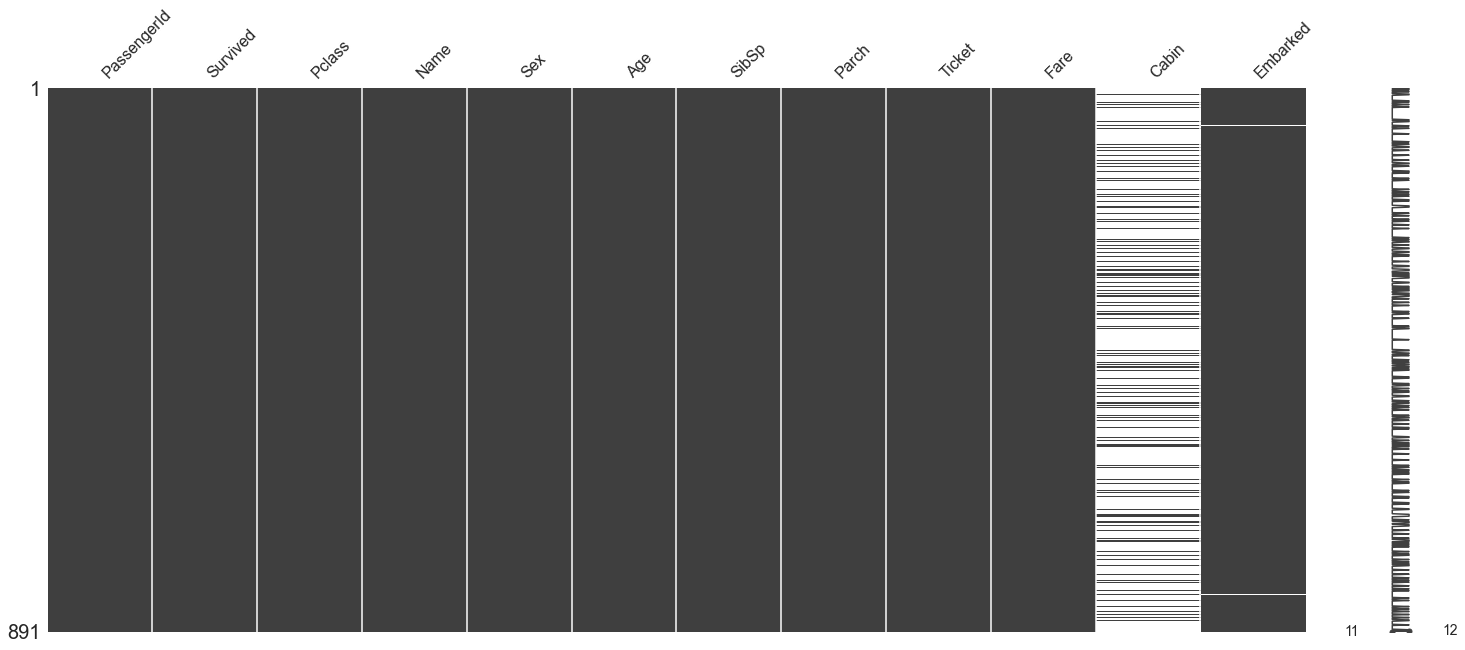

In [18]:
#feature analysis 4(Age)
train["Age"] = train["Age"].fillna(method='ffill')#using LOCF method to fill missing data
missingno.matrix(train,figsize=(25,10))

In [19]:
bin_df['age']=pd.cut(train['Age'],10)#binning
cont_df['age']=train['Age']#not binned
bin_df.head()

,survived,pclass,sex,age
0,0,3,1,"(16.336, 24.294]"
1,1,1,0,"(32.252, 40.21]"
2,1,3,0,"(24.294, 32.252]"
3,1,1,0,"(32.252, 40.21]"
4,0,3,1,"(32.252, 40.21]"


In [20]:
def plot_count(data,bin_df,label_column,target_column,figsize=(25,20),use_bin_df=False):
    if use_bin_df: 
        fig = plt.figure(figsize=figsize)
        plt.subplot(1, 2, 1)
        sb.countplot(y=target_column, data=bin_df);
        plt.subplot(1, 2, 2)
        sb.distplot(data.loc[data[label_column] == 1][target_column], 
                     kde_kws={"label": "Survived"});
        sb.distplot(data.loc[data[label_column] == 0][target_column], 
                     kde_kws={"label": "Did not survive"});
    else:
        fig = plt.figure(figsize=figsize)
        plt.subplot(1, 2, 1)
        sb.countplot(y=target_column, data=data);
        plt.subplot(1, 2, 2)
        sb.distplot(data.loc[data[label_column] == 1][target_column], 
                     kde_kws={"label": "Survived"});
        sb.distplot(data.loc[data[label_column] == 0][target_column], 
                     kde_kws={"label": "Did not survive"});
    

In [21]:
#feature analysis 5(sibsp)
bin_df['sibsp']=train['SibSp']
cont_df['sibsp']=train['SibSp']
train.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

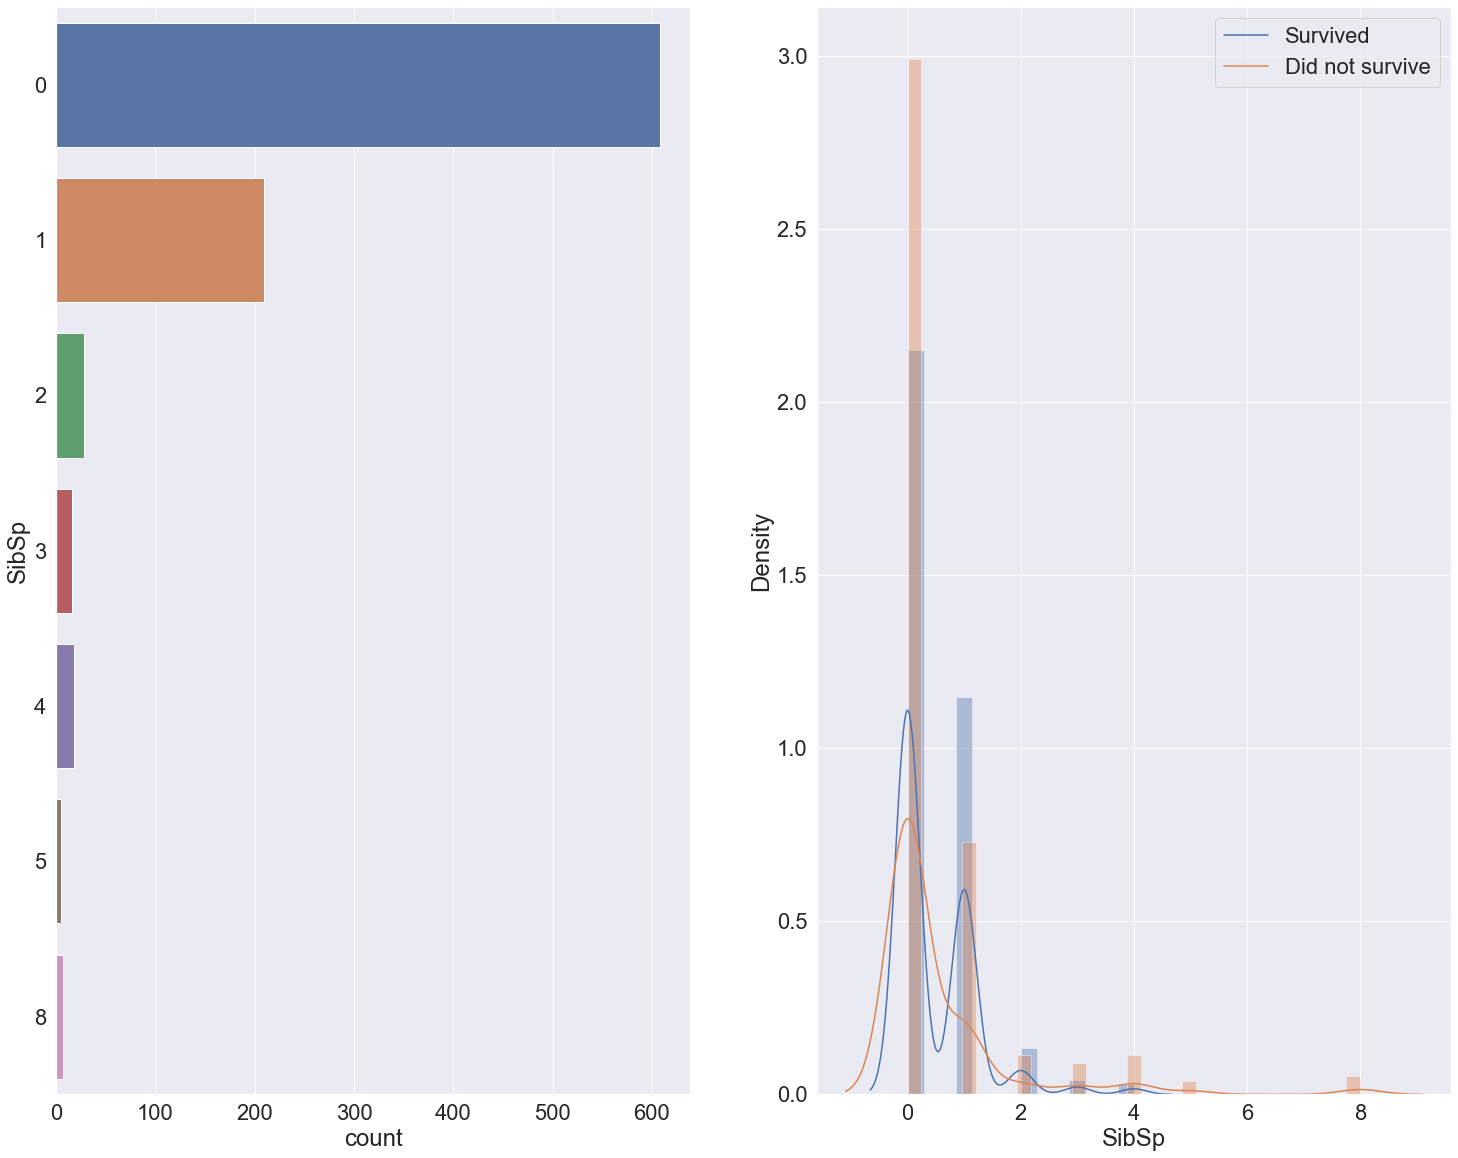

In [22]:
sb.set(font_scale=2)
plot_count(train,bin_df,'Survived','SibSp')
plt.legend()
plt.show()

In [23]:
#feature analysis 6(Parch)

bin_df['parch']=train['Parch']
cont_df['parch']=train['Parch']
train.Parch.value_counts()

0    678
1    118
2     80
3      5
5      5
4      4
6      1
Name: Parch, dtype: int64

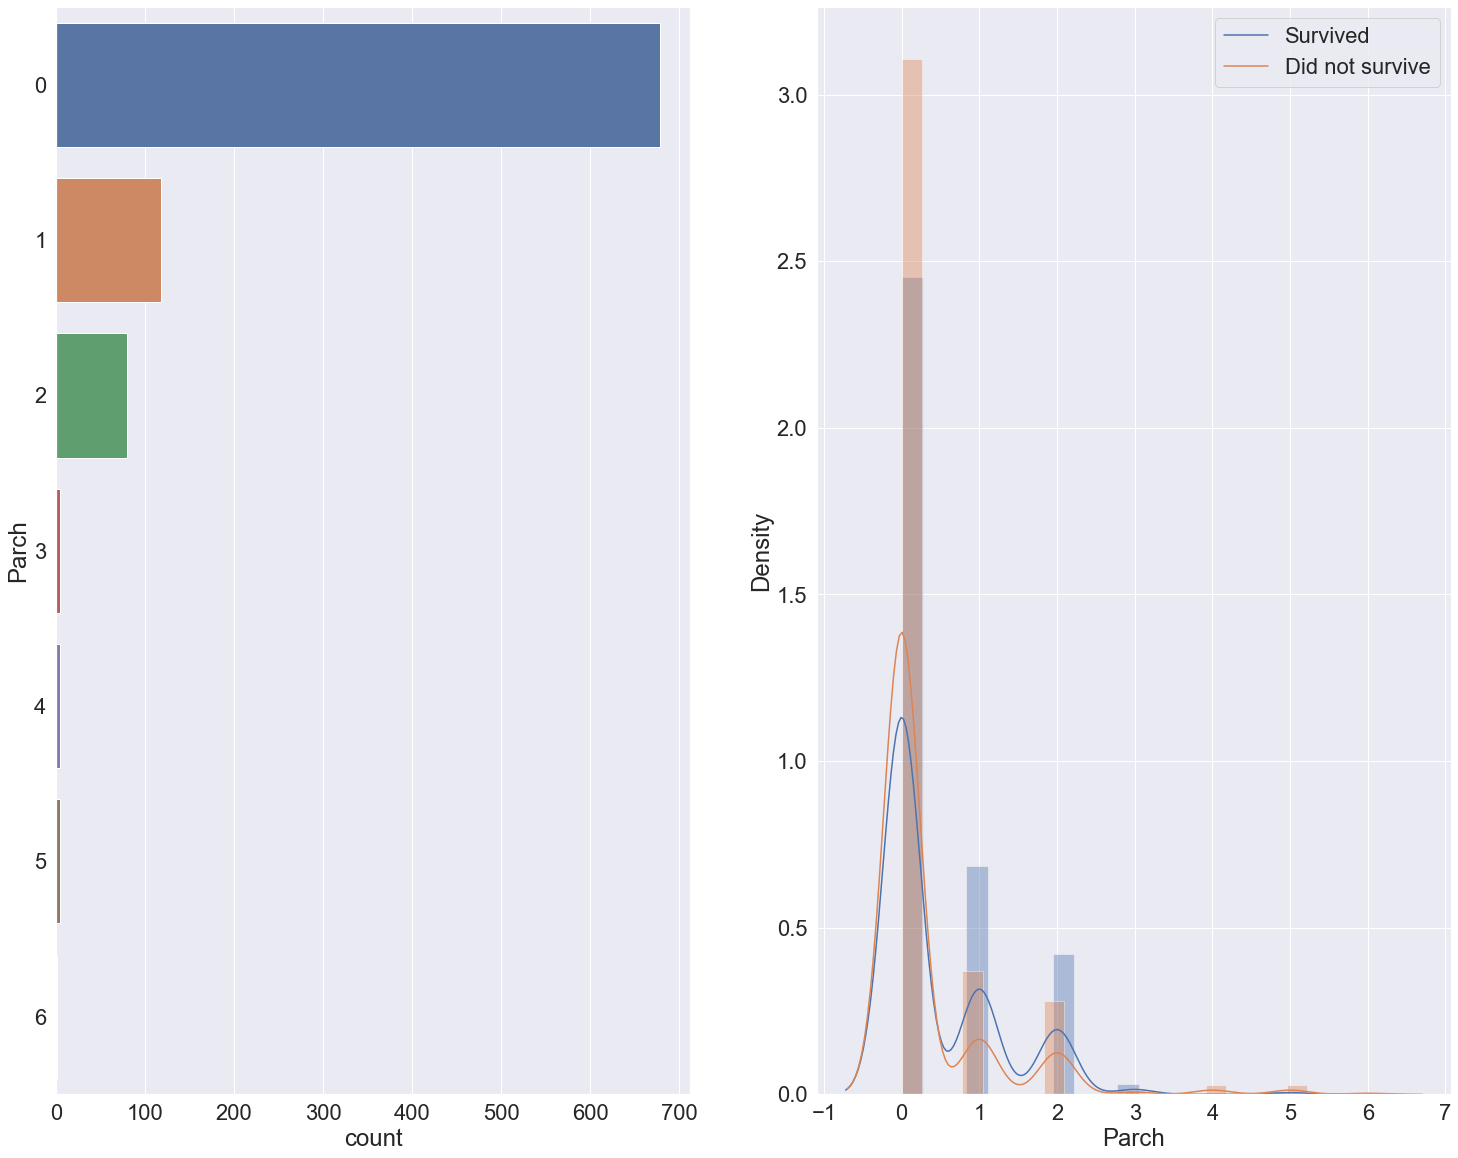

In [24]:
plot_count(train,bin_df,'Survived','Parch')
plt.legend()
plt.show()

In [25]:
#feature analysis 7(Ticket)
train.Ticket.value_counts()

347082      7
1601        7
CA. 2343    7
3101295     6
347088      6
           ..
347466      1
65306       1
28134       1
29105       1
349912      1
Name: Ticket, Length: 681, dtype: int64

In [26]:
#feature analysis 8(Fare)
len(train.Fare.unique())

248

In [27]:
cont_df['fare']=train['Fare']
bin_df['fare']=pd.cut(train['Fare'],5)
bin_df.head()

,survived,pclass,sex,age,sibsp,parch,fare
0,0,3,1,"(16.336, 24.294]",1,0,"(-0.512, 102.466]"
1,1,1,0,"(32.252, 40.21]",1,0,"(-0.512, 102.466]"
2,1,3,0,"(24.294, 32.252]",0,0,"(-0.512, 102.466]"
3,1,1,0,"(32.252, 40.21]",1,0,"(-0.512, 102.466]"
4,0,3,1,"(32.252, 40.21]",0,0,"(-0.512, 102.466]"


In [28]:
bin_df.fare.value_counts()

(-0.512, 102.466]     838
(102.466, 204.932]     33
(204.932, 307.398]     17
(409.863, 512.329]      3
(307.398, 409.863]      0
Name: fare, dtype: int64

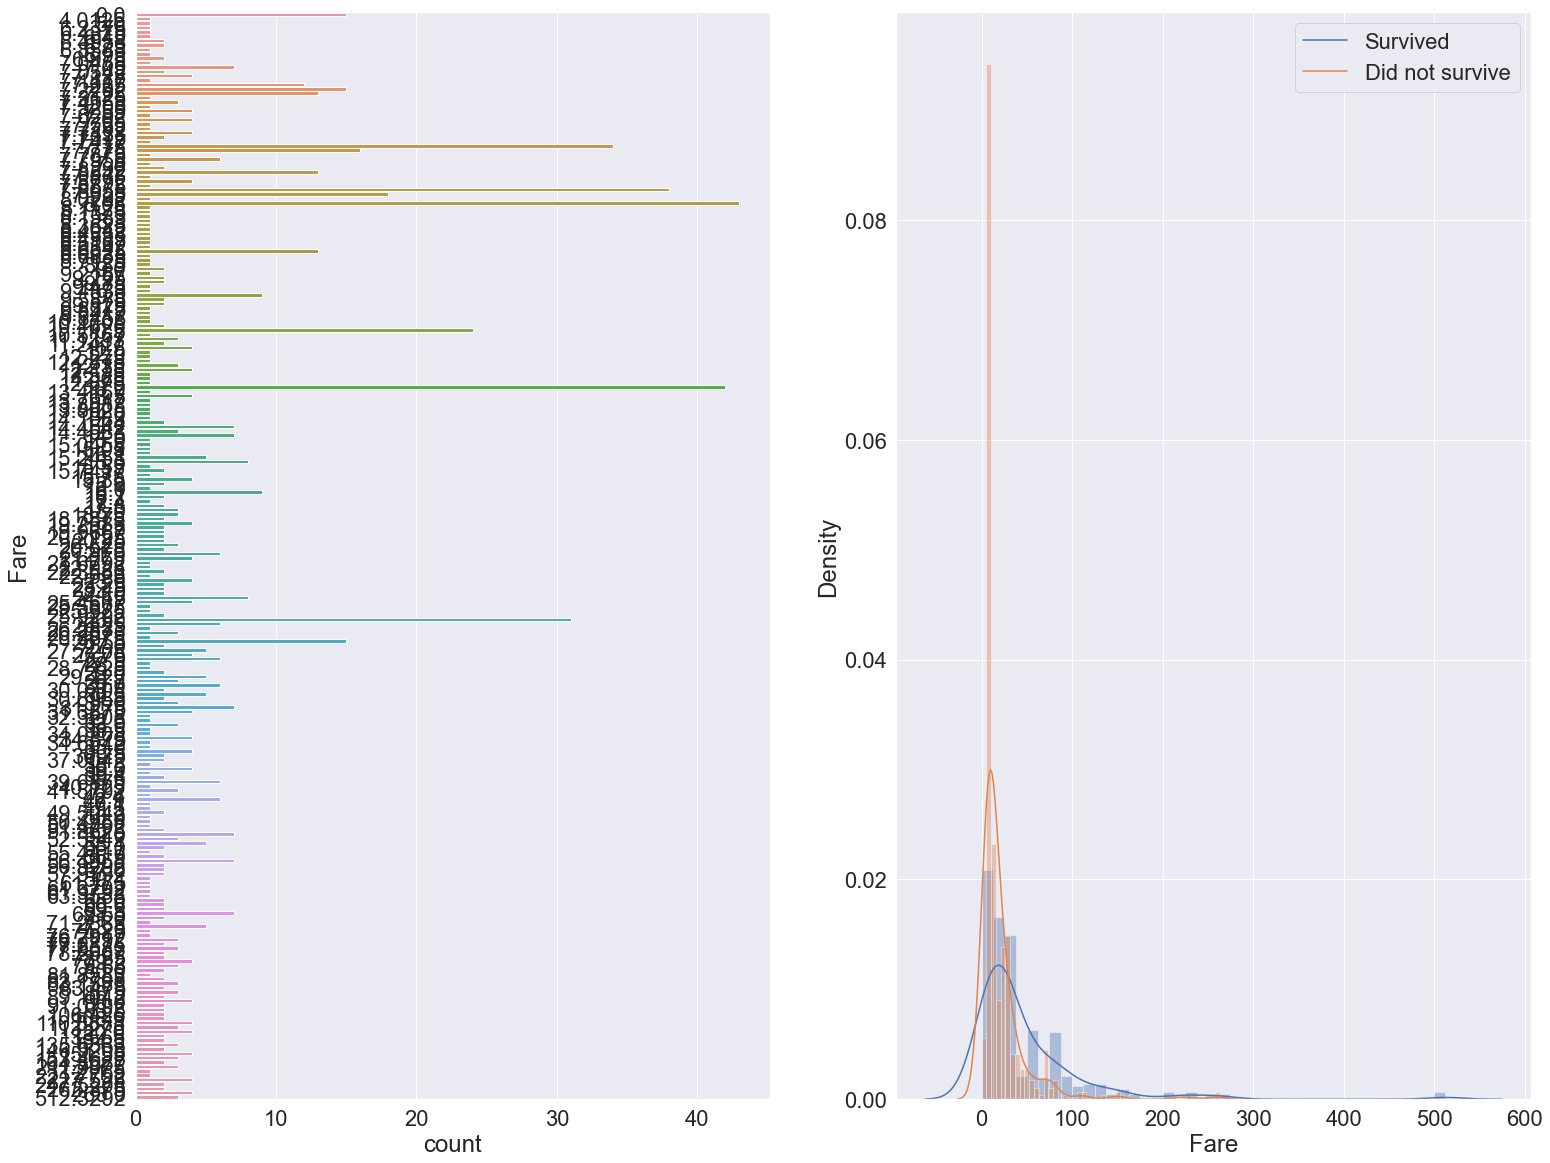

In [38]:
plot_count(train,bin_df,'Survived',target_column='Fare')
plt.legend()

In [41]:
#feature analysis 8(cabin)
missing_values['Cabin']

687

In [43]:
#feature analysis 9(embarked)
print(missing_values['Embarked'])
train.Embarked.value_counts()

2


S    644
C    168
Q     77
Name: Embarked, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Embarked'>

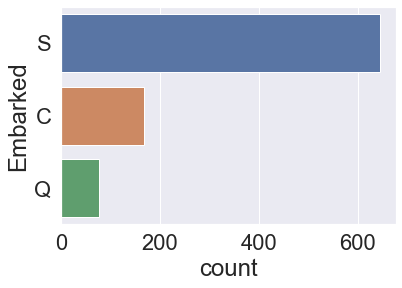

In [45]:
sb.countplot(y='Embarked',data=train)

<AxesSubplot:>

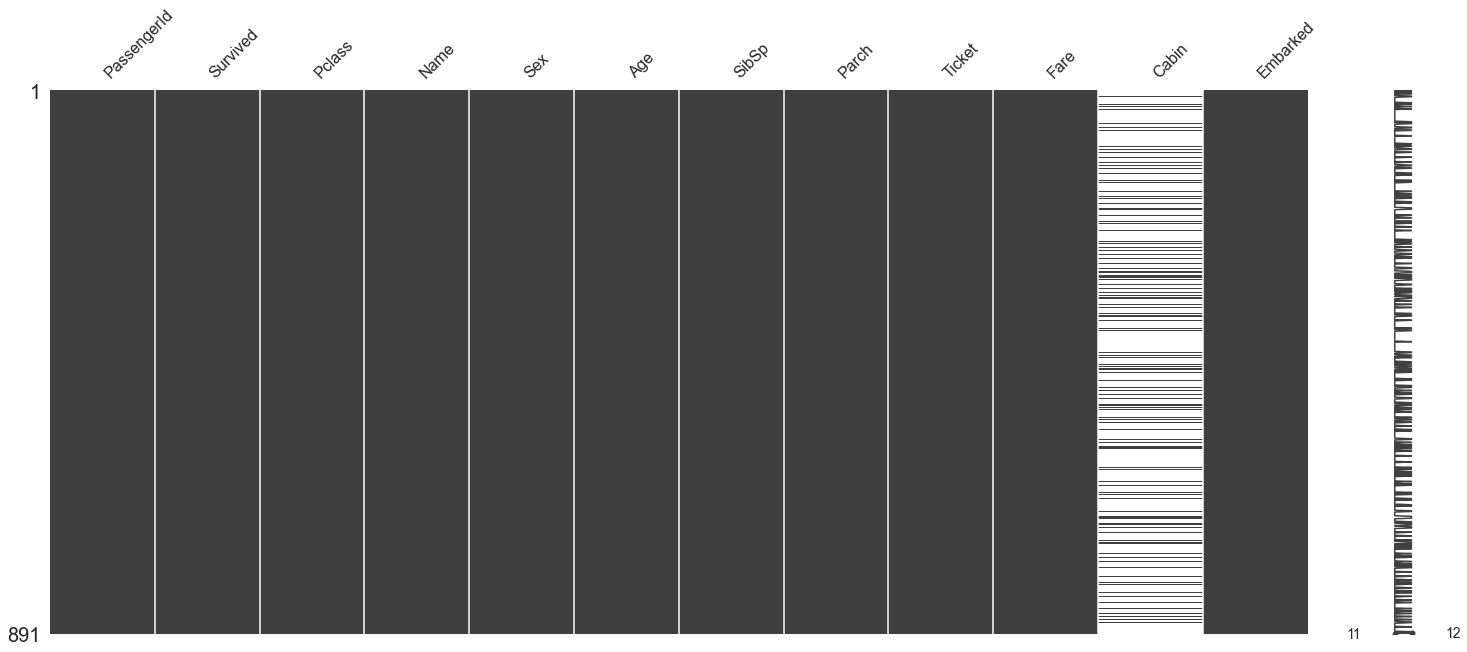

In [50]:
train["Embarked"] = train["Embarked"].fillna(method='ffill')
missingno.matrix(train,figsize=(25,10))

In [53]:
bin_df['embarked']=train['Embarked']
cont_df['embarked']=train['Embarked']
bin_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,1,"(16.336, 24.294]",1,0,"(-0.512, 102.466]",S
1,1,1,0,"(32.252, 40.21]",1,0,"(-0.512, 102.466]",C
2,1,3,0,"(24.294, 32.252]",0,0,"(-0.512, 102.466]",S
3,1,1,0,"(32.252, 40.21]",1,0,"(-0.512, 102.466]",S
4,0,3,1,"(32.252, 40.21]",0,0,"(-0.512, 102.466]",S


In [55]:
#feature encoding
one_hot_cols=bin_df.columns.tolist()
one_hot_cols.remove('survived')
bin_df_enc=pd.get_dummies(bin_df,columns=one_hot_cols)
bin_df_enc.head()

,survived,pclass_1,pclass_2,pclass_3,sex_0,sex_1,"age_(0.34, 8.378]","age_(8.378, 16.336]","age_(16.336, 24.294]","age_(24.294, 32.252]",...,parch_5,parch_6,"fare_(-0.512, 102.466]","fare_(102.466, 204.932]","fare_(204.932, 307.398]","fare_(307.398, 409.863]","fare_(409.863, 512.329]",embarked_C,embarked_Q,embarked_S
0,0,0,0,1,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
1,1,1,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,1,0,0,1,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
3,1,1,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,0,0,0,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [61]:
cont_df_enc=cont_df.apply(LabelEncoder().fit_transform)
cont_df_enc.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,2,1,28,1,0,18,2
1,1,0,0,51,1,0,207,0
2,1,2,0,34,0,0,41,2
3,1,0,0,47,1,0,189,2
4,0,2,1,47,0,0,43,2


In [62]:
df=cont_df_enc


In [68]:
x_train=df.drop('survived',axis=1)#data
y_train=df.survived#labels
x_train.shape
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

In [69]:
x_train.head()

,pclass,sex,age,sibsp,parch,fare,embarked
0,2,1,28,1,0,18,2
1,0,0,51,1,0,207,0
2,2,0,34,0,0,41,2
3,0,0,47,1,0,189,2
4,2,1,47,0,0,43,2


In [75]:
def fit_ml_algo(algo,x_train,y_train,cv):#cv=cross validate
    model=algo.fit(x_train,y_train)
    acc=round(model.score(x_train,y_train)*100,2)
    # Cross Validation 
    train_pred = model_selection.cross_val_predict(algo, 
                                                  x_train, 
                                                  y_train, 
                                                  cv=cv, 
                                                  n_jobs = -1)
    # Cross-validation accuracy metric
    acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    
    return train_pred, acc, acc_cv
    
    

In [104]:
#logistic regression
start_time = time.time()
train_pred_log, acc_log, acc_cv_log = fit_ml_algo(LogisticRegression(), 
                                                               x_train, 
                                                               y_train, 
                                                                    10)
log_time = (time.time() - start_time)
print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))
acc_logi=acc_log

Accuracy: 79.69
Accuracy CV 10-Fold: 79.24
Running Time: 0:00:08.070110


In [113]:
#KNN
start_time = time.time()
train_pred_log, acc_knn, acc_cv_knn= fit_ml_algo(KNeighborsClassifier(), 
                                                               x_train, 
                                                               y_train, 
                                                                    10)
log_time = (time.time() - start_time)
print("Accuracy: {}".format(acc_knn))
print("Accuracy CV 10-Fold: %s" % acc_cv_knn)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))


Accuracy: 76.21
Accuracy CV 10-Fold: 67.34
Running Time: 0:00:00.186018


In [115]:
#Gaussian Naive Bayes
start_time = time.time()
train_pred_log, acc_gnb, acc_cv_gnb = fit_ml_algo(GaussianNB(), 
                                                               x_train, 
                                                               y_train, 
                                                                    10)
log_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gnb)
print("Accuracy CV 10-Fold: %s" % acc_cv_gnb)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))


Accuracy: 77.1
Accuracy CV 10-Fold: 76.32
Running Time: 0:00:00.085010


In [108]:
# Stochastic Gradient Descent
start_time = time.time()
train_pred_sgd, acc_sgd, acc_cv_sgd = fit_ml_algo(SGDClassifier(), 
                                                  x_train, 
                                                  y_train,
                                                  10)
sgd_time = (time.time() - start_time)
print("Accuracy: %s" % acc_sgd)
print("Accuracy CV 10-Fold: %s" % acc_cv_sgd)
print("Running Time: %s" % datetime.timedelta(seconds=sgd_time))


Accuracy: 73.4
Accuracy CV 10-Fold: 63.75
Running Time: 0:00:00.131011


In [82]:
# Linear SVC
start_time = time.time()
train_pred_svc, acc_linear_svc, acc_cv_linear_svc = fit_ml_algo(LinearSVC(),
                                                                x_train, 
                                                                y_train, 
                                                                10)
linear_svc_time = (time.time() - start_time)
print("Accuracy: %s" % acc_linear_svc)
print("Accuracy CV 10-Fold: %s" % acc_cv_linear_svc)
print("Running Time: %s" % datetime.timedelta(seconds=linear_svc_time))


Accuracy: 71.83
Accuracy CV 10-Fold: 69.7
Running Time: 0:00:00.530999


In [83]:
# Decision Tree Classifier
start_time = time.time()
train_pred_dt, acc_dt, acc_cv_dt = fit_ml_algo(DecisionTreeClassifier(), 
                                                                x_train, 
                                                                y_train,
                                                                10)
dt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_dt)
print("Accuracy CV 10-Fold: %s" % acc_cv_dt)
print("Running Time: %s" % datetime.timedelta(seconds=dt_time))

Accuracy: 98.43
Accuracy CV 10-Fold: 76.54
Running Time: 0:00:00.477005


In [85]:
# Gradient Boosting Trees
start_time = time.time()
train_pred_gbt, acc_gbt, acc_cv_gbt = fit_ml_algo(GradientBoostingClassifier(), 
                                                                       x_train, 
                                                                       y_train,
                                                                       10)
gbt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gbt)
print("Accuracy CV 10-Fold: %s" % acc_cv_gbt)
print("Running Time: %s" % datetime.timedelta(seconds=gbt_time))

Accuracy: 89.0
Accuracy CV 10-Fold: 82.15
Running Time: 0:00:00.793214


In [86]:
#catboost algorithm
x_train.head()

,pclass,sex,age,sibsp,parch,fare,embarked
0,2,1,28,1,0,18,2
1,0,0,51,1,0,207,0
2,2,0,34,0,0,41,2
3,0,0,47,1,0,189,2
4,2,1,47,0,0,43,2


In [92]:
features=np.where(x_train.dtypes!=np.float)[0]
features

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

In [93]:
train_pool=Pool(x_train,y_train,features)

In [96]:
catboost_model = CatBoostClassifier(iterations=1000,
                                    custom_loss=['Accuracy'],
                                    loss_function='Logloss')

# Fit CatBoost model
catboost_model.fit(train_pool,
                   plot=True)

# CatBoost accuracy
acc_catboost = round(catboost_model.score(x_train, y_train) * 100, 2)


Custom logger is already specified. Specify more than one logger at same time is not thread safe.

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.009807
0:	learn: 0.6876604	total: 44.3ms	remaining: 44.2s
1:	learn: 0.6820226	total: 94.1ms	remaining: 46.9s
2:	learn: 0.6770297	total: 123ms	remaining: 40.9s
3:	learn: 0.6718638	total: 153ms	remaining: 38s
4:	learn: 0.6662961	total: 197ms	remaining: 39.1s
5:	learn: 0.6613383	total: 247ms	remaining: 40.8s
6:	learn: 0.6558764	total: 306ms	remaining: 43.3s
7:	learn: 0.6510963	total: 349ms	remaining: 43.3s
8:	learn: 0.6461190	total: 397ms	remaining: 43.8s
9:	learn: 0.6416196	total: 448ms	remaining: 44.4s
10:	learn: 0.6369075	total: 496ms	remaining: 44.6s
11:	learn: 0.6321066	total: 581ms	remaining: 47.8s
12:	learn: 0.6278408	total: 637ms	remaining: 48.4s
13:	learn: 0.6235972	total: 687ms	remaining: 48.4s
14:	learn: 0.6192383	total: 727ms	remaining: 47.7s
15:	learn: 0.6153079	total: 765ms	remaining: 47s
16:	learn: 0.6117499	total: 811ms	remaining: 46.9s
17:	learn: 0.6076935	total: 849ms	remaining: 46.3s
18:	learn: 0.6035097	total: 927ms	remaining: 47.9s
19:	learn: 0.

163:	learn: 0.4156024	total: 7.89s	remaining: 40.2s
164:	learn: 0.4150056	total: 7.94s	remaining: 40.2s
165:	learn: 0.4147234	total: 8s	remaining: 40.2s
166:	learn: 0.4141392	total: 8.08s	remaining: 40.3s
167:	learn: 0.4135739	total: 8.13s	remaining: 40.2s
168:	learn: 0.4132810	total: 8.18s	remaining: 40.2s
169:	learn: 0.4126212	total: 8.22s	remaining: 40.1s
170:	learn: 0.4119423	total: 8.27s	remaining: 40.1s
171:	learn: 0.4115344	total: 8.32s	remaining: 40.1s
172:	learn: 0.4109817	total: 8.37s	remaining: 40s
173:	learn: 0.4107024	total: 8.44s	remaining: 40.1s
174:	learn: 0.4099100	total: 8.49s	remaining: 40s
175:	learn: 0.4095222	total: 8.54s	remaining: 40s
176:	learn: 0.4088394	total: 8.62s	remaining: 40.1s
177:	learn: 0.4080761	total: 8.67s	remaining: 40s
178:	learn: 0.4074748	total: 8.72s	remaining: 40s
179:	learn: 0.4070566	total: 8.77s	remaining: 40s
180:	learn: 0.4066178	total: 8.82s	remaining: 39.9s
181:	learn: 0.4058087	total: 8.86s	remaining: 39.8s
182:	learn: 0.4051162	total

324:	learn: 0.3670577	total: 15.9s	remaining: 33.1s
325:	learn: 0.3670546	total: 15.9s	remaining: 33s
326:	learn: 0.3669114	total: 16s	remaining: 32.9s
327:	learn: 0.3667539	total: 16s	remaining: 32.8s
328:	learn: 0.3663618	total: 16.1s	remaining: 32.8s
329:	learn: 0.3662181	total: 16.1s	remaining: 32.7s
330:	learn: 0.3660812	total: 16.2s	remaining: 32.7s
331:	learn: 0.3659104	total: 16.2s	remaining: 32.7s
332:	learn: 0.3658948	total: 16.3s	remaining: 32.6s
333:	learn: 0.3657799	total: 16.3s	remaining: 32.5s
334:	learn: 0.3655047	total: 16.4s	remaining: 32.5s
335:	learn: 0.3651190	total: 16.5s	remaining: 32.5s
336:	learn: 0.3649613	total: 16.5s	remaining: 32.5s
337:	learn: 0.3648179	total: 16.6s	remaining: 32.4s
338:	learn: 0.3646324	total: 16.6s	remaining: 32.4s
339:	learn: 0.3644774	total: 16.7s	remaining: 32.4s
340:	learn: 0.3643203	total: 16.7s	remaining: 32.3s
341:	learn: 0.3639630	total: 16.8s	remaining: 32.3s
342:	learn: 0.3637993	total: 16.9s	remaining: 32.3s
343:	learn: 0.3636

484:	learn: 0.3404266	total: 25.3s	remaining: 26.9s
485:	learn: 0.3401563	total: 25.4s	remaining: 26.9s
486:	learn: 0.3399756	total: 25.4s	remaining: 26.8s
487:	learn: 0.3397841	total: 25.6s	remaining: 26.8s
488:	learn: 0.3393580	total: 25.6s	remaining: 26.8s
489:	learn: 0.3392937	total: 25.7s	remaining: 26.7s
490:	learn: 0.3392122	total: 25.7s	remaining: 26.7s
491:	learn: 0.3388883	total: 25.8s	remaining: 26.6s
492:	learn: 0.3387413	total: 25.8s	remaining: 26.6s
493:	learn: 0.3385390	total: 25.9s	remaining: 26.6s
494:	learn: 0.3385390	total: 26s	remaining: 26.5s
495:	learn: 0.3383327	total: 26.1s	remaining: 26.5s
496:	learn: 0.3382683	total: 26.1s	remaining: 26.4s
497:	learn: 0.3382602	total: 26.1s	remaining: 26.3s
498:	learn: 0.3379165	total: 26.2s	remaining: 26.3s
499:	learn: 0.3376538	total: 26.2s	remaining: 26.2s
500:	learn: 0.3375147	total: 26.3s	remaining: 26.2s
501:	learn: 0.3373347	total: 26.3s	remaining: 26.1s
502:	learn: 0.3371676	total: 26.4s	remaining: 26.1s
503:	learn: 0.

643:	learn: 0.3175657	total: 35.7s	remaining: 19.8s
644:	learn: 0.3171934	total: 35.8s	remaining: 19.7s
645:	learn: 0.3171455	total: 35.9s	remaining: 19.7s
646:	learn: 0.3170620	total: 36s	remaining: 19.6s
647:	learn: 0.3165957	total: 36.1s	remaining: 19.6s
648:	learn: 0.3162319	total: 36.1s	remaining: 19.5s
649:	learn: 0.3160250	total: 36.2s	remaining: 19.5s
650:	learn: 0.3159501	total: 36.3s	remaining: 19.4s
651:	learn: 0.3158430	total: 36.3s	remaining: 19.4s
652:	learn: 0.3156568	total: 36.4s	remaining: 19.3s
653:	learn: 0.3153484	total: 36.5s	remaining: 19.3s
654:	learn: 0.3150489	total: 36.5s	remaining: 19.2s
655:	learn: 0.3149066	total: 36.6s	remaining: 19.2s
656:	learn: 0.3144473	total: 36.7s	remaining: 19.2s
657:	learn: 0.3142871	total: 36.8s	remaining: 19.1s
658:	learn: 0.3141714	total: 36.9s	remaining: 19.1s
659:	learn: 0.3140167	total: 37s	remaining: 19.1s
660:	learn: 0.3139396	total: 37.1s	remaining: 19s
661:	learn: 0.3138271	total: 37.2s	remaining: 19s
662:	learn: 0.313767

804:	learn: 0.2954377	total: 47.6s	remaining: 11.5s
805:	learn: 0.2951751	total: 47.7s	remaining: 11.5s
806:	learn: 0.2950639	total: 47.8s	remaining: 11.4s
807:	learn: 0.2948427	total: 47.9s	remaining: 11.4s
808:	learn: 0.2947421	total: 48s	remaining: 11.3s
809:	learn: 0.2946406	total: 48.1s	remaining: 11.3s
810:	learn: 0.2945918	total: 48.2s	remaining: 11.2s
811:	learn: 0.2945567	total: 48.2s	remaining: 11.2s
812:	learn: 0.2942579	total: 48.3s	remaining: 11.1s
813:	learn: 0.2942333	total: 48.4s	remaining: 11.1s
814:	learn: 0.2942105	total: 48.5s	remaining: 11s
815:	learn: 0.2941596	total: 48.6s	remaining: 10.9s
816:	learn: 0.2940633	total: 48.7s	remaining: 10.9s
817:	learn: 0.2940080	total: 48.8s	remaining: 10.8s
818:	learn: 0.2939834	total: 48.9s	remaining: 10.8s
819:	learn: 0.2938398	total: 48.9s	remaining: 10.7s
820:	learn: 0.2937603	total: 49s	remaining: 10.7s
821:	learn: 0.2937119	total: 49.1s	remaining: 10.6s
822:	learn: 0.2935288	total: 49.2s	remaining: 10.6s
823:	learn: 0.2933

963:	learn: 0.2771283	total: 58.5s	remaining: 2.18s
964:	learn: 0.2769384	total: 58.6s	remaining: 2.12s
965:	learn: 0.2769063	total: 58.6s	remaining: 2.06s
966:	learn: 0.2768489	total: 58.7s	remaining: 2s
967:	learn: 0.2767517	total: 58.7s	remaining: 1.94s
968:	learn: 0.2763962	total: 58.8s	remaining: 1.88s
969:	learn: 0.2762741	total: 58.8s	remaining: 1.82s
970:	learn: 0.2761980	total: 58.9s	remaining: 1.76s
971:	learn: 0.2760526	total: 59s	remaining: 1.7s
972:	learn: 0.2759868	total: 59s	remaining: 1.64s
973:	learn: 0.2757516	total: 59.1s	remaining: 1.58s
974:	learn: 0.2756650	total: 59.1s	remaining: 1.51s
975:	learn: 0.2755317	total: 59.2s	remaining: 1.46s
976:	learn: 0.2754226	total: 59.3s	remaining: 1.4s
977:	learn: 0.2754028	total: 59.3s	remaining: 1.33s
978:	learn: 0.2753756	total: 59.4s	remaining: 1.27s
979:	learn: 0.2752277	total: 59.5s	remaining: 1.21s
980:	learn: 0.2752164	total: 59.5s	remaining: 1.15s
981:	learn: 0.2751699	total: 59.6s	remaining: 1.09s
982:	learn: 0.2749936

In [98]:
# How long will this take?
start_time = time.time()

# Set params for cross-validation as same as initial model
cv_params = catboost_model.get_params()

# Run the cross-validation for 10-folds (same as the other models)
cv_data = cv(train_pool,
             cv_params,
             fold_count=10,
             plot=True)

# How long did it take?
catboost_time = (time.time() - start_time)

# CatBoost CV results save into a dataframe (cv_data), let's withdraw the maximum accuracy score
acc_cv_catboost = round(np.max(cv_data['test-Accuracy-mean']) * 100, 2)


Custom logger is already specified. Specify more than one logger at same time is not thread safe.

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6747491	test: 0.6748916	best: 0.6748916 (0)
1:	learn: 0.6590126	test: 0.6594192	best: 0.6594192 (1)
2:	learn: 0.6442007	test: 0.6452882	best: 0.6452882 (2)
3:	learn: 0.6301038	test: 0.6319038	best: 0.6319038 (3)
4:	learn: 0.6172997	test: 0.6195368	best: 0.6195368 (4)
5:	learn: 0.6059921	test: 0.6083904	best: 0.6083904 (5)
6:	learn: 0.5953014	test: 0.5980529	best: 0.5980529 (6)
7:	learn: 0.5846494	test: 0.5877573	best: 0.5877573 (7)
8:	learn: 0.5748248	test: 0.5782907	best: 0.5782907 (8)
9:	learn: 0.5657463	test: 0.5696079	best: 0.5696079 (9)
10:	learn: 0.5570916	test: 0.5614807	best: 0.5614807 (10)	total: 10.3s	remaining: 15m 22s
11:	learn: 0.5491128	test: 0.5538599	best: 0.5538599 (11)
12:	learn: 0.5414571	test: 0.5466909	best: 0.5466909 (12)
13:	learn: 0.5346102	test: 0.5402302	best: 0.5402302 (13)
14:	learn: 0.5283710	test: 0.5344204	best: 0.5344204 (14)
15:	learn: 0.5227676	test: 0.5293318	best: 0.5293318 (15)	total: 15.3s	remaining: 15m 38s
16:	learn: 0.5180292	test: 0

128:	learn: 0.3545981	test: 0.4281337	best: 0.4281337 (128)
129:	learn: 0.3540046	test: 0.4277078	best: 0.4277078 (129)
130:	learn: 0.3533780	test: 0.4273150	best: 0.4273150 (130)
131:	learn: 0.3527701	test: 0.4274168	best: 0.4273150 (130)
132:	learn: 0.3520869	test: 0.4272324	best: 0.4272324 (132)	total: 2m 17s	remaining: 14m 57s
133:	learn: 0.3513630	test: 0.4270749	best: 0.4270749 (133)
134:	learn: 0.3508672	test: 0.4268546	best: 0.4268546 (134)
135:	learn: 0.3501458	test: 0.4269511	best: 0.4268546 (134)
136:	learn: 0.3496559	test: 0.4269392	best: 0.4268546 (134)
137:	learn: 0.3491108	test: 0.4269170	best: 0.4268546 (134)	total: 2m 22s	remaining: 14m 52s
138:	learn: 0.3484703	test: 0.4269739	best: 0.4268546 (134)
139:	learn: 0.3479320	test: 0.4269241	best: 0.4268546 (134)
140:	learn: 0.3474625	test: 0.4270452	best: 0.4268546 (134)
141:	learn: 0.3468336	test: 0.4273365	best: 0.4268546 (134)
142:	learn: 0.3461619	test: 0.4273524	best: 0.4268546 (134)
143:	learn: 0.3457572	test: 0.4271

254:	learn: 0.2956615	test: 0.4254595	best: 0.4254595 (254)
255:	learn: 0.2952499	test: 0.4254599	best: 0.4254595 (254)
256:	learn: 0.2947078	test: 0.4255592	best: 0.4254595 (254)
257:	learn: 0.2944300	test: 0.4254909	best: 0.4254595 (254)
258:	learn: 0.2939184	test: 0.4253094	best: 0.4253094 (258)
259:	learn: 0.2935861	test: 0.4252030	best: 0.4252030 (259)	total: 4m 29s	remaining: 12m 45s
260:	learn: 0.2931921	test: 0.4251591	best: 0.4251591 (260)
261:	learn: 0.2928592	test: 0.4251294	best: 0.4251294 (261)
262:	learn: 0.2923826	test: 0.4252814	best: 0.4251294 (261)
263:	learn: 0.2919201	test: 0.4252203	best: 0.4251294 (261)	total: 4m 33s	remaining: 12m 42s
264:	learn: 0.2916299	test: 0.4250342	best: 0.4250342 (264)
265:	learn: 0.2912413	test: 0.4250462	best: 0.4250342 (264)
266:	learn: 0.2908688	test: 0.4249063	best: 0.4249063 (266)
267:	learn: 0.2906158	test: 0.4248907	best: 0.4248907 (267)	total: 4m 37s	remaining: 12m 38s
268:	learn: 0.2903340	test: 0.4248338	best: 0.4248338 (268)
2

380:	learn: 0.2497280	test: 0.4275244	best: 0.4246835 (274)
381:	learn: 0.2494088	test: 0.4273918	best: 0.4246835 (274)
382:	learn: 0.2491291	test: 0.4274177	best: 0.4246835 (274)
383:	learn: 0.2486738	test: 0.4275651	best: 0.4246835 (274)	total: 6m 25s	remaining: 10m 17s
384:	learn: 0.2483194	test: 0.4277740	best: 0.4246835 (274)
385:	learn: 0.2481027	test: 0.4278086	best: 0.4246835 (274)
386:	learn: 0.2476469	test: 0.4280877	best: 0.4246835 (274)
387:	learn: 0.2473268	test: 0.4282346	best: 0.4246835 (274)
388:	learn: 0.2469860	test: 0.4281675	best: 0.4246835 (274)	total: 6m 30s	remaining: 10m 12s
389:	learn: 0.2467099	test: 0.4281761	best: 0.4246835 (274)
390:	learn: 0.2463664	test: 0.4282193	best: 0.4246835 (274)
391:	learn: 0.2460141	test: 0.4281355	best: 0.4246835 (274)
392:	learn: 0.2458591	test: 0.4280986	best: 0.4246835 (274)
393:	learn: 0.2455988	test: 0.4281338	best: 0.4246835 (274)	total: 6m 34s	remaining: 10m 7s
394:	learn: 0.2453647	test: 0.4281222	best: 0.4246835 (274)
39

503:	learn: 0.2128793	test: 0.4314203	best: 0.4246835 (274)	total: 8m 34s	remaining: 8m 26s
504:	learn: 0.2126751	test: 0.4315318	best: 0.4246835 (274)
505:	learn: 0.2124270	test: 0.4316593	best: 0.4246835 (274)	total: 8m 37s	remaining: 8m 25s
506:	learn: 0.2122068	test: 0.4315569	best: 0.4246835 (274)
507:	learn: 0.2119442	test: 0.4316300	best: 0.4246835 (274)
508:	learn: 0.2116855	test: 0.4317656	best: 0.4246835 (274)
509:	learn: 0.2114157	test: 0.4319007	best: 0.4246835 (274)
510:	learn: 0.2112345	test: 0.4318934	best: 0.4246835 (274)	total: 8m 44s	remaining: 8m 21s
511:	learn: 0.2108725	test: 0.4317122	best: 0.4246835 (274)
512:	learn: 0.2105885	test: 0.4316861	best: 0.4246835 (274)
513:	learn: 0.2103217	test: 0.4316797	best: 0.4246835 (274)
514:	learn: 0.2101047	test: 0.4315727	best: 0.4246835 (274)
515:	learn: 0.2098850	test: 0.4315719	best: 0.4246835 (274)	total: 8m 51s	remaining: 8m 18s
516:	learn: 0.2095792	test: 0.4317654	best: 0.4246835 (274)
517:	learn: 0.2092794	test: 0.43

629:	learn: 0.1832051	test: 0.4381923	best: 0.4246835 (274)
630:	learn: 0.1831086	test: 0.4383024	best: 0.4246835 (274)
631:	learn: 0.1828516	test: 0.4384971	best: 0.4246835 (274)
632:	learn: 0.1826162	test: 0.4384266	best: 0.4246835 (274)	total: 10m 56s	remaining: 6m 20s
633:	learn: 0.1823923	test: 0.4384497	best: 0.4246835 (274)
634:	learn: 0.1822148	test: 0.4384288	best: 0.4246835 (274)
635:	learn: 0.1820121	test: 0.4385432	best: 0.4246835 (274)
636:	learn: 0.1817957	test: 0.4385822	best: 0.4246835 (274)
637:	learn: 0.1816382	test: 0.4385806	best: 0.4246835 (274)
638:	learn: 0.1814622	test: 0.4385672	best: 0.4246835 (274)	total: 11m 2s	remaining: 6m 14s
639:	learn: 0.1812976	test: 0.4384723	best: 0.4246835 (274)
640:	learn: 0.1810828	test: 0.4384407	best: 0.4246835 (274)
641:	learn: 0.1808870	test: 0.4383804	best: 0.4246835 (274)
642:	learn: 0.1806466	test: 0.4383281	best: 0.4246835 (274)
643:	learn: 0.1804018	test: 0.4383267	best: 0.4246835 (274)
644:	learn: 0.1801159	test: 0.43823

753:	learn: 0.1589011	test: 0.4470120	best: 0.4246835 (274)	total: 12m 58s	remaining: 4m 14s
754:	learn: 0.1587288	test: 0.4470901	best: 0.4246835 (274)
755:	learn: 0.1586058	test: 0.4470229	best: 0.4246835 (274)
756:	learn: 0.1584254	test: 0.4471404	best: 0.4246835 (274)
757:	learn: 0.1582670	test: 0.4472254	best: 0.4246835 (274)	total: 13m 3s	remaining: 4m 10s
758:	learn: 0.1581161	test: 0.4471520	best: 0.4246835 (274)
759:	learn: 0.1578229	test: 0.4470576	best: 0.4246835 (274)
760:	learn: 0.1576614	test: 0.4471020	best: 0.4246835 (274)
761:	learn: 0.1575080	test: 0.4471099	best: 0.4246835 (274)	total: 13m 9s	remaining: 4m 6s
762:	learn: 0.1573969	test: 0.4471569	best: 0.4246835 (274)
763:	learn: 0.1571574	test: 0.4472134	best: 0.4246835 (274)
764:	learn: 0.1570310	test: 0.4474578	best: 0.4246835 (274)
765:	learn: 0.1568666	test: 0.4475677	best: 0.4246835 (274)
766:	learn: 0.1567161	test: 0.4475178	best: 0.4246835 (274)	total: 13m 15s	remaining: 4m 1s
767:	learn: 0.1565574	test: 0.44

876:	learn: 0.1392544	test: 0.4533784	best: 0.4246835 (274)
877:	learn: 0.1391049	test: 0.4534012	best: 0.4246835 (274)
878:	learn: 0.1389354	test: 0.4534911	best: 0.4246835 (274)
879:	learn: 0.1388006	test: 0.4533405	best: 0.4246835 (274)
880:	learn: 0.1386721	test: 0.4533265	best: 0.4246835 (274)	total: 15m 39s	remaining: 2m 6s
881:	learn: 0.1385388	test: 0.4533572	best: 0.4246835 (274)
882:	learn: 0.1383791	test: 0.4533672	best: 0.4246835 (274)
883:	learn: 0.1382409	test: 0.4535378	best: 0.4246835 (274)
884:	learn: 0.1380934	test: 0.4535872	best: 0.4246835 (274)
885:	learn: 0.1379626	test: 0.4536350	best: 0.4246835 (274)	total: 15m 45s	remaining: 2m 1s
886:	learn: 0.1378250	test: 0.4537713	best: 0.4246835 (274)
887:	learn: 0.1376662	test: 0.4537337	best: 0.4246835 (274)
888:	learn: 0.1375747	test: 0.4539412	best: 0.4246835 (274)
889:	learn: 0.1374003	test: 0.4538729	best: 0.4246835 (274)
890:	learn: 0.1372609	test: 0.4537921	best: 0.4246835 (274)	total: 15m 51s	remaining: 1m 56s
891

999:	learn: 0.1235608	test: 0.4612393	best: 0.4246835 (274)	total: 18m 10s	remaining: 0us


In [101]:
print("Accuracy: {}".format(acc_catboost))
print("Accuracy cross-validation 10-Fold: {}".format(acc_cv_catboost))
print("Running Time: {}".format(datetime.timedelta(seconds=catboost_time)))

Accuracy: 89.9
Accuracy cross-validation 10-Fold: 81.38
Running Time: 0:18:12.889874


In [111]:
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Trees',
              'CatBoost'],
    'Score': [
        acc_knn, 
        acc_logi,  
        acc_gnb, 
        acc_sgd, 
        acc_linear_svc, 
        acc_dt,
        acc_gbt,
        acc_catboost
    ]})
print("Accuracy Scores")
models.sort_values(by='Score', ascending=False)

Accuracy Scores


,Model,Score
5,Decision Tree,98.43
7,CatBoost,89.90
6,Gradient Boosting Trees,89.00
1,Logistic Regression,79.69
2,Naive Bayes,77.10
0,KNN,76.21
3,Stochastic Gradient Decent,73.40
4,Linear SVC,71.83


In [117]:
cv_models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Trees',
              'CatBoost'],
    'Score': [
        acc_cv_knn, 
        acc_cv_log,      
        acc_cv_gnb, 
        acc_cv_sgd, 
        acc_cv_linear_svc, 
        acc_cv_dt,
        acc_cv_gbt,
        acc_cv_catboost
    ]})
print('Cross-validation Accuracy Scores')
cv_models.sort_values(by='Score', ascending=False)


Cross-validation Accuracy Scores


,Model,Score
6,Gradient Boosting Trees,82.15
7,CatBoost,81.38
5,Decision Tree,76.54
1,Logistic Regression,76.32
2,Naive Bayes,76.32
4,Linear SVC,69.70
0,KNN,67.34
3,Stochastic Gradient Decent,63.75


In [127]:
#feature importance
def feature_importance(model, data):
    """
    Function to show which features are most important in the model.
    ::param_model:: Which model to use?
    ::param_data:: What data to use?
    """
    fea_imp = pd.DataFrame({'imp': model.feature_importances_, 'col': data.columns})
    fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-30:]
    _ = fea_imp.plot(kind='barh', x='col', y='imp', figsize=(20, 10))
    return fea_imp
    plt.savefig('catboost_feature_importance.png')

,imp,col
3,8.911586,sibsp
6,9.315456,embarked
4,10.486915,parch
5,13.099846,fare
2,15.774436,age
0,17.927330,pclass
1,24.484431,sex


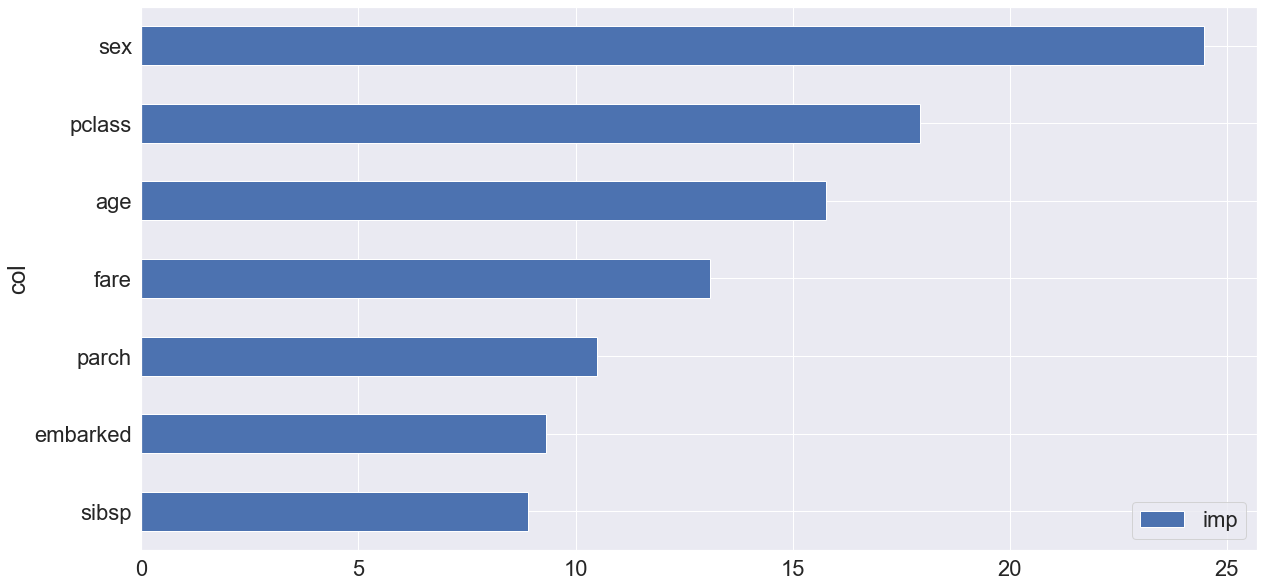

In [128]:
feature_importance(catboost_model, x_train)

In [129]:
x_train.head()

,pclass,sex,age,sibsp,parch,fare,embarked
0,2,1,28,1,0,18,2
1,0,0,51,1,0,207,0
2,2,0,34,0,0,41,2
3,0,0,47,1,0,189,2
4,2,1,47,0,0,43,2


In [169]:
test.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Age_58.0,Age_59.0,Age_60.0,Age_60.5,Age_61.0,Age_62.0,Age_63.0,Age_64.0,Age_67.0,Age_76.0
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,...,0,0,0,0,0,0,0,0,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,...,0,0,0,0,0,0,0,0,0,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,...,0,0,0,0,0,1,0,0,0,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,...,0,0,0,0,0,0,0,0,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,...,0,0,0,0,0,0,0,0,0,0


In [167]:
test_embarked_one_hot = pd.get_dummies(test['Embarked'], 
                                       prefix='Embarked')

test_sex_one_hot = pd.get_dummies(test['Sex'], 
                                prefix='Sex')

test_plcass_one_hot = pd.get_dummies(test['Pclass'], 
                                   prefix='Pclass')

test_plcass_one_hot = pd.get_dummies(test['Age'], 
                                   prefix='Age')
test = pd.concat([test, 
                  test_embarked_one_hot, 
                  test_sex_one_hot, 
                  test_plcass_one_hot,test_plcass_one_hot], axis=1)

In [185]:

x_train.head()

,pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,2,1,28,1,0,18,2
1,0,0,51,1,0,207,0
2,2,0,34,0,0,41,2
3,0,0,47,1,0,189,2
4,2,1,47,0,0,43,2


In [186]:

req_test_cols=x_train.columns
req_test_cols


Index(['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked'], dtype='object')

In [199]:
predictions=catboost_model.predict(test[req_test_cols].apply(LabelEncoder().fit_transform))

In [200]:
predictions[:20]

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1],
      dtype=int64)

In [201]:
submission = pd.DataFrame()
submission['PassengerId'] = test['PassengerId']
submission['Survived'] = predictions # our model predictions on the test dataset
submission.head(20)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [202]:
gs.head(20)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [210]:
submission.to_csv(r'C:\Users\niran\Downloads\Titanic/titanic_submission.csv', index=False)
print('Submission CSV is ready!')


Submission CSV is ready!


In [212]:
submissions_check = pd.read_csv(r"C:\Users\niran\Downloads\Titanic/titanic_submission.csv")
submissions_check.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
